# Problem statement: Predict whether a patient is susceptible to heart disease or not.

The dataset is available publicly on kaggle platform. The following is the link for the datset:
https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

# Description of columns
- <b>age - age in years </b>
- <b>sex - sex </b>
<ul>
    <li>1 = male</li>
    <li>0 = female</li>
</ul>
- <b>cp - chest pain type </b>
<ul>
    <li>1 = typical angina</li>
    <li>2 = atypical angina</li>
    <li>3 = non-anginal pain</li>
    <li>4 = asymptomatic</li>
</ul>
- <b>trestbps - resting blood pressure (in mm Hg on admission to the hospital) </b>
- <b>chol - serum cholestoral in mg/dl </b>
- <b>fbs - fasting blood sugar > 120 mg/dl</b>
   <ul>
    <li>1 = true</li>
    <li>0 = false</li>
   </ul>
- <b>restecg - resting electrocardiographic results</b>
    <ul>
    <li>0 = normal</li>
    <li>1 = having ST-T</li>
    <li>2 = hypertrophy</li>
    </ul>
- <b>thalach - maximum heart rate achieved </b>
- <b>exng - exercise induced angina</b>
    <ul>
    <li>1 = yes</li>
    <li>0 = no</li>
    </ul>
- <b>oldpeak - ST depression induced by exercise relative to rest </b>
- <b>slope - the slope of the peak exercise ST segment </b>
    <ul>
    <li>1 = upsloping</li>
    <li>2 = flat</li>
    <li>3 = downsloping</li>
    </ul>
- <b>ca - number of major vessels (0-3) colored by flourosopy</b>
- <b>thal </b>
  <ul>
    <li>3 = normal</li>
    <li>6 = fixed defect</li>
    <li>7 = reversable defect</li>
    </ul>
- <b>num - the predicted attribute - diagnosis of heart disease (angiographic disease status)</b>
    <ul>
    <li>Value 0 = < 50% diameter narrowing</li>
    <li>Value 1 = > 50% diameter narrowing</li>
    </ul>

In [37]:
# Importing librarires required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
# loading the dataset
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [39]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# renaming the columns
data.rename(columns = {'cp':'chestpain_type',
                       'trtbps':'resting_bp(mmHg)',
                       'chol':'cholesterol(mg/dl)',
                       'fbs':'fasting_bloodSugar(>120mg/dl)',
                       'restecg':'resting_ecg',
                       'thalachh':'resting_heartrate',
                       'exng':'exercise_induced_angina',
                       'slp':'slope',
                       'caa':'num_major_vessels'
                      }, inplace = True)

In [5]:
data.columns

Index(['age', 'sex', 'chestpain_type', 'resting_bp(mmHg)',
       'cholesterol(mg/dl)', 'fasting_bloodSugar(>120mg/dl)', 'resting_ecg',
       'resting_heartrate', 'exercise_induced_angina', 'oldpeak', 'slope',
       'num_major_vessels', 'thall', 'output'],
      dtype='object')

## Exploratory data analysis

In [6]:
data.output.value_counts()

1    165
0    138
Name: output, dtype: int64

## Percentage of people susceptible to heart disease vs not susceptible

(-1.25, 1.25, -1.25, 1.25)

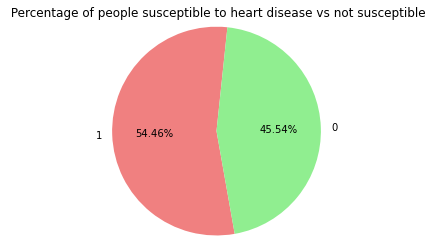

In [7]:
# 1 indicating affected by heart disease, 0 not affected
plt.title(" Percentage of people susceptible to heart disease vs not susceptible")
plt.pie(data.output.value_counts(),
        labels=[1,0],
        colors=['lightcoral','lightgreen'],
        autopct='%1.2f%%',
        startangle=84,
        radius=1.2)

plt.axis("off")

## Filtering people based on output

In [8]:
high_chance = data[data['output']==1]
low_chance = data[data['output']==0]

In [9]:
high_chance.columns

Index(['age', 'sex', 'chestpain_type', 'resting_bp(mmHg)',
       'cholesterol(mg/dl)', 'fasting_bloodSugar(>120mg/dl)', 'resting_ecg',
       'resting_heartrate', 'exercise_induced_angina', 'oldpeak', 'slope',
       'num_major_vessels', 'thall', 'output'],
      dtype='object')

## What is effect of age on heart disease?

## Which gender is afffected most by heartattack?(0-male,1-female)


## Effect of exerise ?

## What is the most occuring chest pain? 
<b>chest pain type:</b>
- 1 = typical angina;
- 2 = atypical angina;
- 3 = non-anginal pain;
- 4 = asymptomatic)


In [10]:
categorical_features = []
for column in high_chance.columns:
    if (high_chance[column].nunique() < 20) and (column != 'output'):
        categorical_features.append(column)
print(categorical_features)

['sex', 'chestpain_type', 'fasting_bloodSugar(>120mg/dl)', 'resting_ecg', 'exercise_induced_angina', 'slope', 'num_major_vessels', 'thall']


In [11]:
d = {}
for col in categorical_features:
    #print(high_chance[col].value_counts(),'\n')
    d[col]=high_chance[col].value_counts()
    
df = pd.DataFrame(d)
df.fillna(' ',inplace=True)
df

,sex,chestpain_type,fasting_bloodSugar(>120mg/dl),resting_ecg,exercise_induced_angina,slope,num_major_vessels,thall
0,72,39,142,68,142,9,130,1
1,93,41,23,96,23,49,21,6
2,,69,,1,,107,7,130
3,,16,,,,,3,28
4,,,,,,,4,


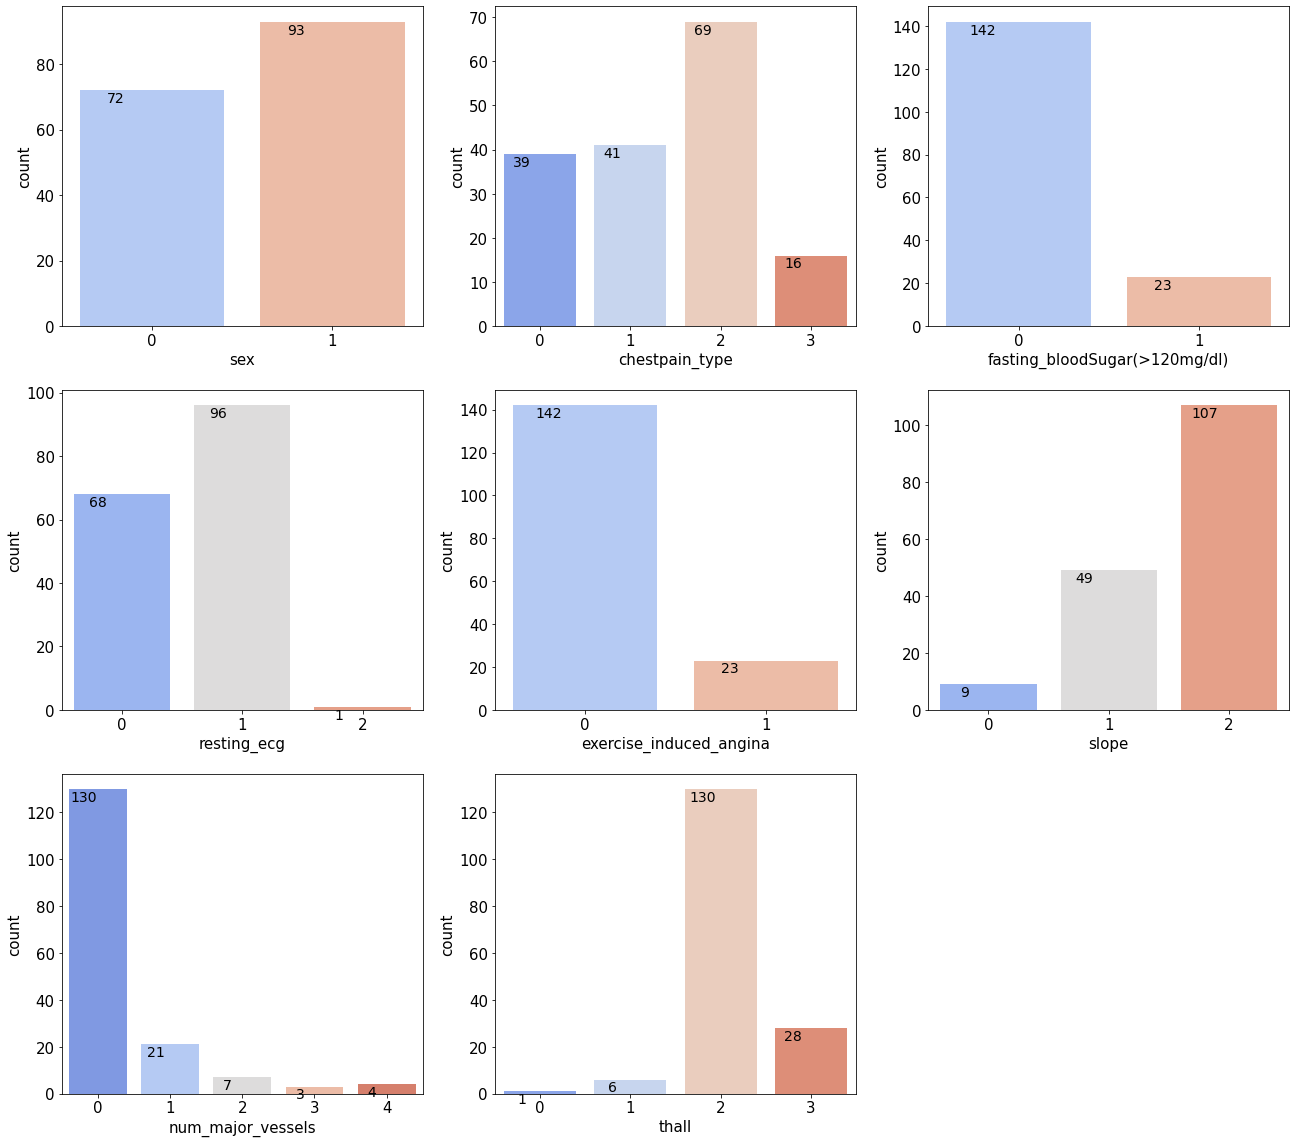

In [12]:
plt.figure(figsize=(22,20))
plt.rc('font', size=15)
for i in range(1,len(categorical_features)+1):
    plt.subplot(3,3,i)
  
    ax =sns.countplot(high_chance[categorical_features[i-1]],palette='coolwarm')
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), 
                    ha='center',
                    va='center',
                    color='black',
                    size=14)

In [13]:
continuos_features = [column for column in high_chance.columns if (column not in categorical_features) and (column !='output')]
print(continuos_features)

['age', 'resting_bp(mmHg)', 'cholesterol(mg/dl)', 'resting_heartrate', 'oldpeak']


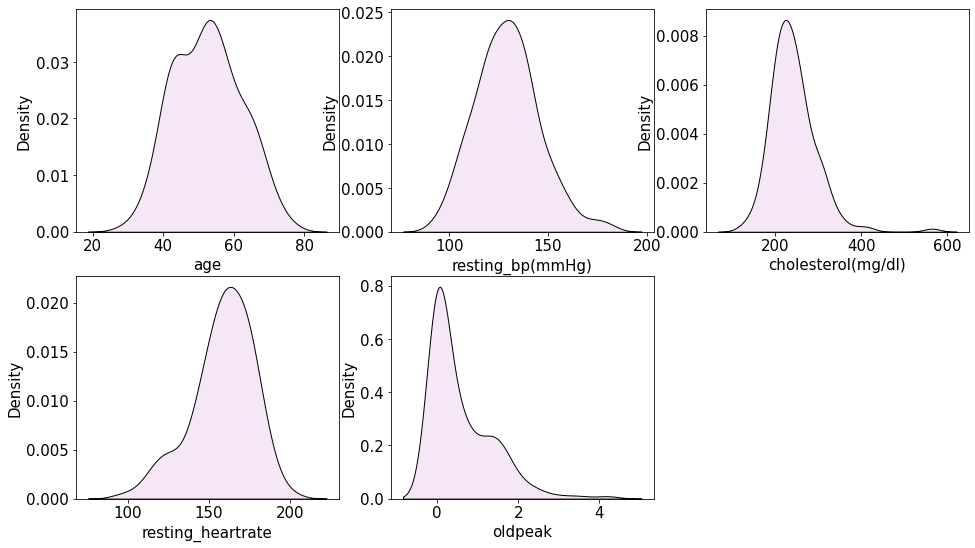

In [14]:
plt.figure(figsize=(16,9))
for i in range(1,len(continuos_features)+1):
    plt.subplot(2,3,i)
    sns.kdeplot(high_chance[continuos_features[i-1]],
                color = 'plum',
                fill=True,
                ec='black'
            
            )

In [15]:
col_names = ['age','cholesterol(mg/dl)','resting_bp(mmHg)','resting_heartrate']
for column in col_names:
    print(column)
    print(high_chance[column].describe()[['min','max','mean']])
    print('\n')

age
min     29.00000
max     76.00000
mean    52.49697
Name: age, dtype: float64


cholesterol(mg/dl)
min     126.000000
max     564.000000
mean    242.230303
Name: cholesterol(mg/dl), dtype: float64


resting_bp(mmHg)
min      94.00000
max     180.00000
mean    129.30303
Name: resting_bp(mmHg), dtype: float64


resting_heartrate
min      96.000000
max     202.000000
mean    158.466667
Name: resting_heartrate, dtype: float64




### Summary of observations:
- In the data given, 54.5% people are susceptible to heart disease and 46.5% people are not susceptible.
- The age ranges from with a minimum of 29 years to maximum of 76 years, in disease prone people. The mean age of getting disease is 52, which is alarming.
- out of all the people affected by disease 46.3% were males, where as 56.3% are female. This indicates female are affected most by heart disease.
- atypical angina is the dominant type of heart disease, which most people are effected with.
- mean cholesterol is 242mg/dl for people affected with disease. People having Total cholesterol>200mg/dl is generally considered to be at high risk of developing heart disease
- normal bp ranges from 120/80mmHg, mean resting_bp for people affected with disease is 129 mmHG, indicating high bloodpressure contributes to developing heart diseases.
- A normal resting heart rate range is between 60 and 100 bpm. People with heart disease has higher heart rate with minimum bpm of 96 to a max of 202. The mean bpm is 158. Indicating that increase in heart rate increases the chances of heart disease.
- out of 165 people affcted by heart disease, only in 23 exercise has induced angina. 

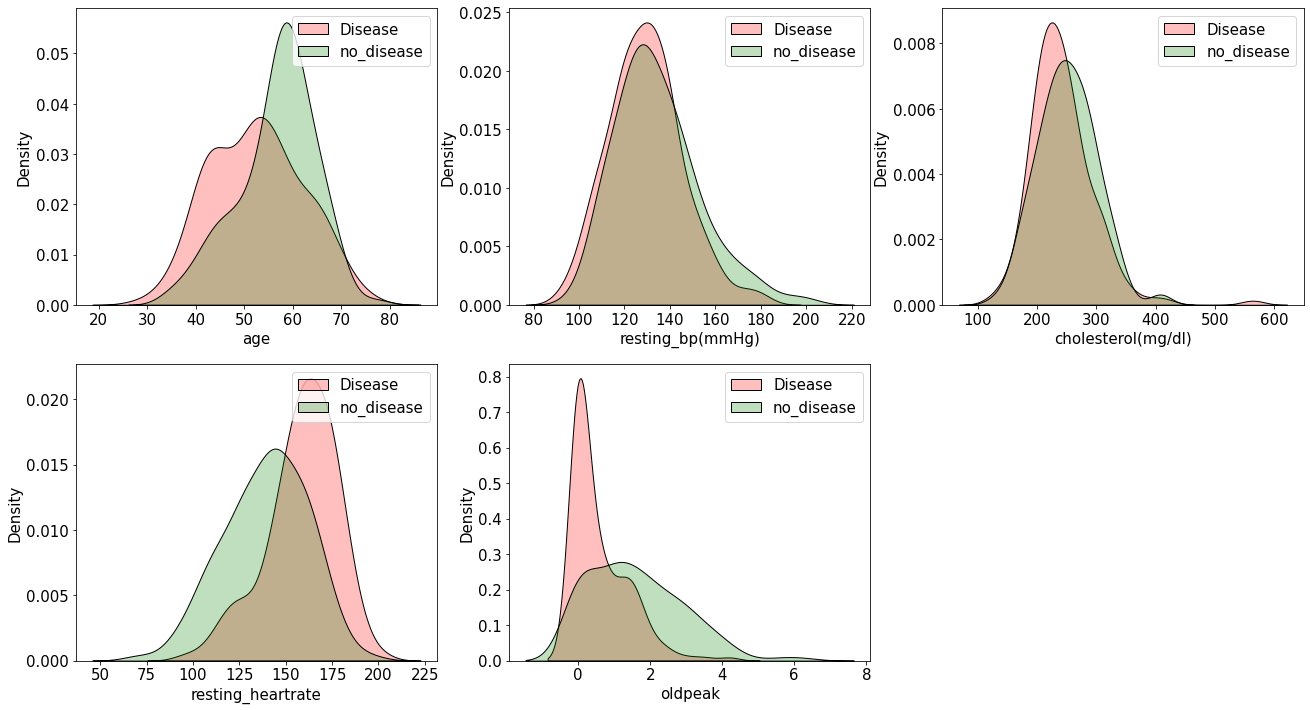

In [16]:
plt.figure(figsize=(22,12))
for i in range(1,len(continuos_features)+1):
    plt.subplot(2,3,i)
    sns.kdeplot(high_chance[continuos_features[i-1]],
                color = 'red',
                fill=True,
                ec='black')
    sns.kdeplot(low_chance[continuos_features[i-1]],
                color = 'green',
                fill=True,
                ec='black')
    plt.legend(['Disease','no_disease'],loc='best')

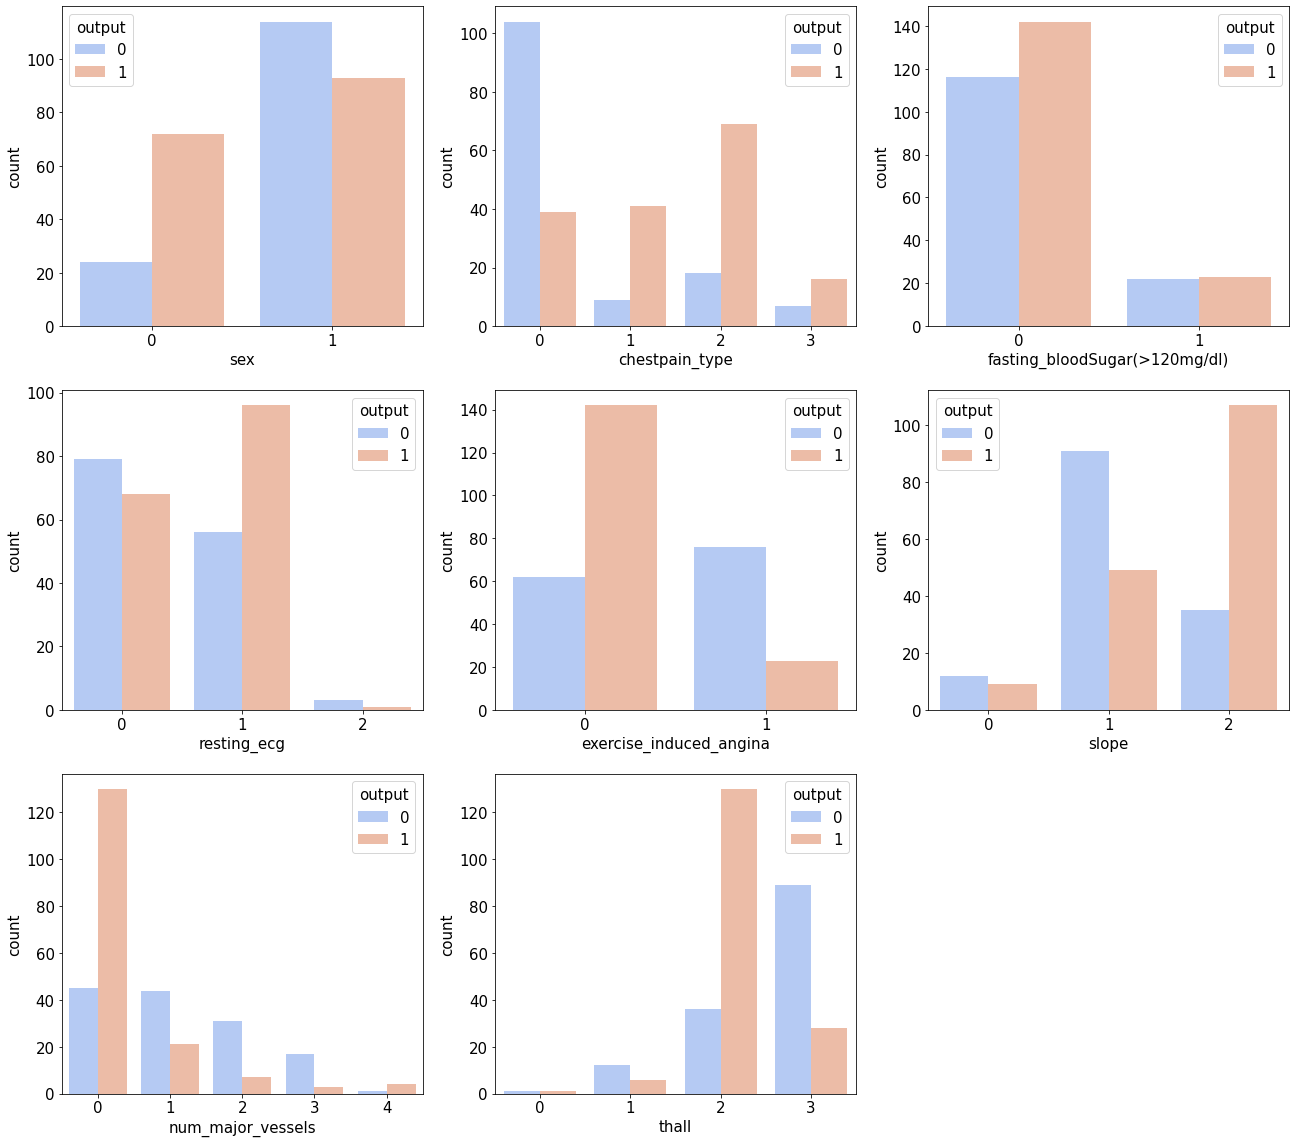

In [17]:
plt.figure(figsize=(22,20))
plt.rc('font', size=15)
for i in range(1,len(categorical_features)+1):
    plt.subplot(3,3,i)
    sns.countplot(data[categorical_features[i-1]],palette='coolwarm',hue=data['output'])

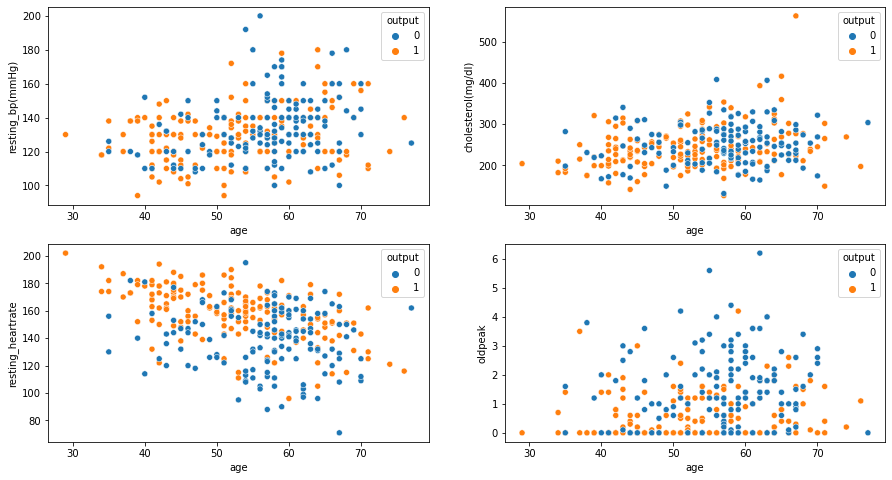

In [18]:
plt.figure(figsize=(15,8))
plt.rc('font',size=10)
for i in range(len(continuos_features)-1):
    plt.subplot(2,2,i+1)
    sns.scatterplot(data=data,x=data[continuos_features[0]],y=data[continuos_features[i+1]],hue=data['output'])

In [36]:
corr_data = data.corr()
corr_data

,age,sex,chestpain_type,resting_bp(mmHg),cholesterol(mg/dl),fasting_bloodSugar(>120mg/dl),resting_ecg,resting_heartrate,exercise_induced_angina,oldpeak,slope,num_major_vessels,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chestpain_type,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_bp(mmHg),0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol(mg/dl),0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_bloodSugar(>120mg/dl),0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
resting_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
resting_heartrate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

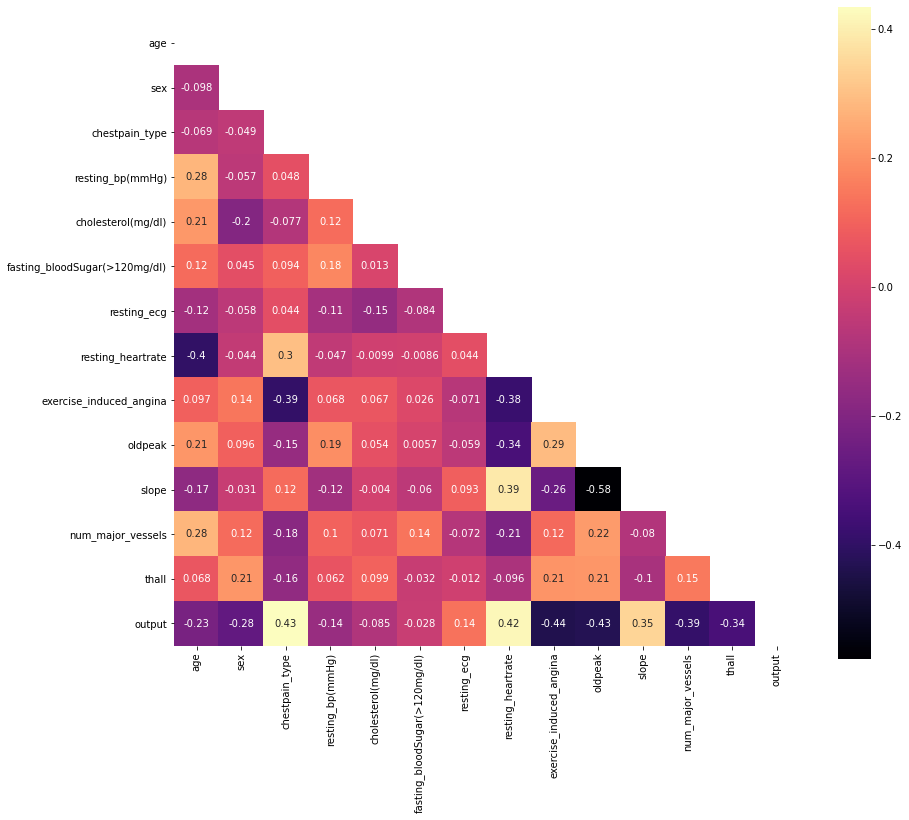

In [39]:
mask = np.triu(np.ones_like(corr_data, dtype=np.bool))
plt.figure(figsize=(14,12))
sns.heatmap(corr_data,
            square=True, 
            mask=mask,
            annot=True,
            cmap='magma')

## Data Modelling

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [32]:
X = data.drop(columns='output')
y = data['output']


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=12)

In [23]:
print(f"x_train length : {len(x_train)}")
print(f"x_test length : {len(x_test)}")

x_train length : 242
x_test length : 61


In [25]:
# scale the data

sc = StandardScaler()
x_train[continuos_features] = sc.fit_transform(x_train[continuos_features])
x_test[continuos_features] = sc.transform(x_test[continuos_features])

In [26]:
logistic_clf = LogisticRegression(random_state=54)
forest_clf = RandomForestClassifier(random_state=54)
svc_clf = SVC(random_state=54)

models = [logistic_clf,forest_clf,svc_clf]

for i in range(len(models)):
    print('\t'*4,models[i],'\n')
    model = models[i].fit(x_train,y_train)
    predictions = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, predictions)
    acc_score = accuracy_score(y_test, predictions)
    print("confussion matrix")
    print(conf_matrix)
    print("\n")
    print("Accuracy : ",acc_score*100,'\n')
    print(classification_report(y_test,predictions))
    print("--------------------------------------------------------------------\n")

				 LogisticRegression(random_state=54) 

confussion matrix
[[18 10]
 [ 3 30]]


Accuracy :  78.68852459016394 

              precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61

--------------------------------------------------------------------

				 RandomForestClassifier(random_state=54) 

confussion matrix
[[16 12]
 [ 2 31]]


Accuracy :  77.04918032786885 

              precision    recall  f1-score   support

           0       0.89      0.57      0.70        28
           1       0.72      0.94      0.82        33

    accuracy                           0.77        61
   macro avg       0.80      0.76      0.76        61
weighted avg       0.80      0.77      0.76        61

--------------------------------------------

In [32]:
parameters = [{'penalty':['l1','l2'],'fit_intercept':[True,False],'C':range(1,10)},
{'n_estimators':[100,200,300],'max_features':range(2,5,1),'bootstrap':[True,False]},
{'kernel':('linear', 'rbf'), 'C':[1, 10]}]

score_dict = {}
for i in range(len(models)):
    print(f"**************** Model : {models[i]}******************")
    search = GridSearchCV(models[i],
                          param_grid=parameters[i],
                          scoring='accuracy',
                          n_jobs=-1,
                          cv=StratifiedKFold(n_splits=10),
                          verbose=2)
    search.fit(x_train,y_train)
          
    print("Best estimator : ",search.best_estimator_,"\n")
          
    pred = search.best_estimator_.predict(x_test)
    score_dict[models[i]] = accuracy_score(y_test,pred)

**************** Model : LogisticRegression(random_state=54)******************
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best estimator :  LogisticRegression(C=1, fit_intercept=False, random_state=54) 

**************** Model : RandomForestClassifier(random_state=54)******************
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   12.6s finished


Best estimator :  RandomForestClassifier(max_features=2, n_estimators=200, random_state=54) 

**************** Model : SVC(random_state=54)******************
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best estimator :  SVC(C=1, kernel='linear', random_state=54) 



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


In [33]:
score_dict

{LogisticRegression(random_state=54): 0.7704918032786885,
 RandomForestClassifier(random_state=54): 0.8360655737704918,
 SVC(random_state=54): 0.7868852459016393}

In [34]:
score_dict.values()

dict_values([0.7704918032786885, 0.8360655737704918, 0.7868852459016393])

In [35]:
df = pd.DataFrame({'accuracy':score_dict.values()},index=['LogisticRegression','RandomForest','SVC'])
df

,accuracy
LogisticRegression,0.770492
RandomForest,0.836066
SVC,0.786885


In [35]:
import pickle
with open('Pickle_LR_Model.pkl', 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LogisticRegression(C=1, fit_intercept=False, random_state=54)

In [36]:
Pickled_LR_Model.predict(x_test)

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)